In [67]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [68]:
data = pd.read_csv('BostonHousing.csv', encoding='utf8')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


'''
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
'''

In [69]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

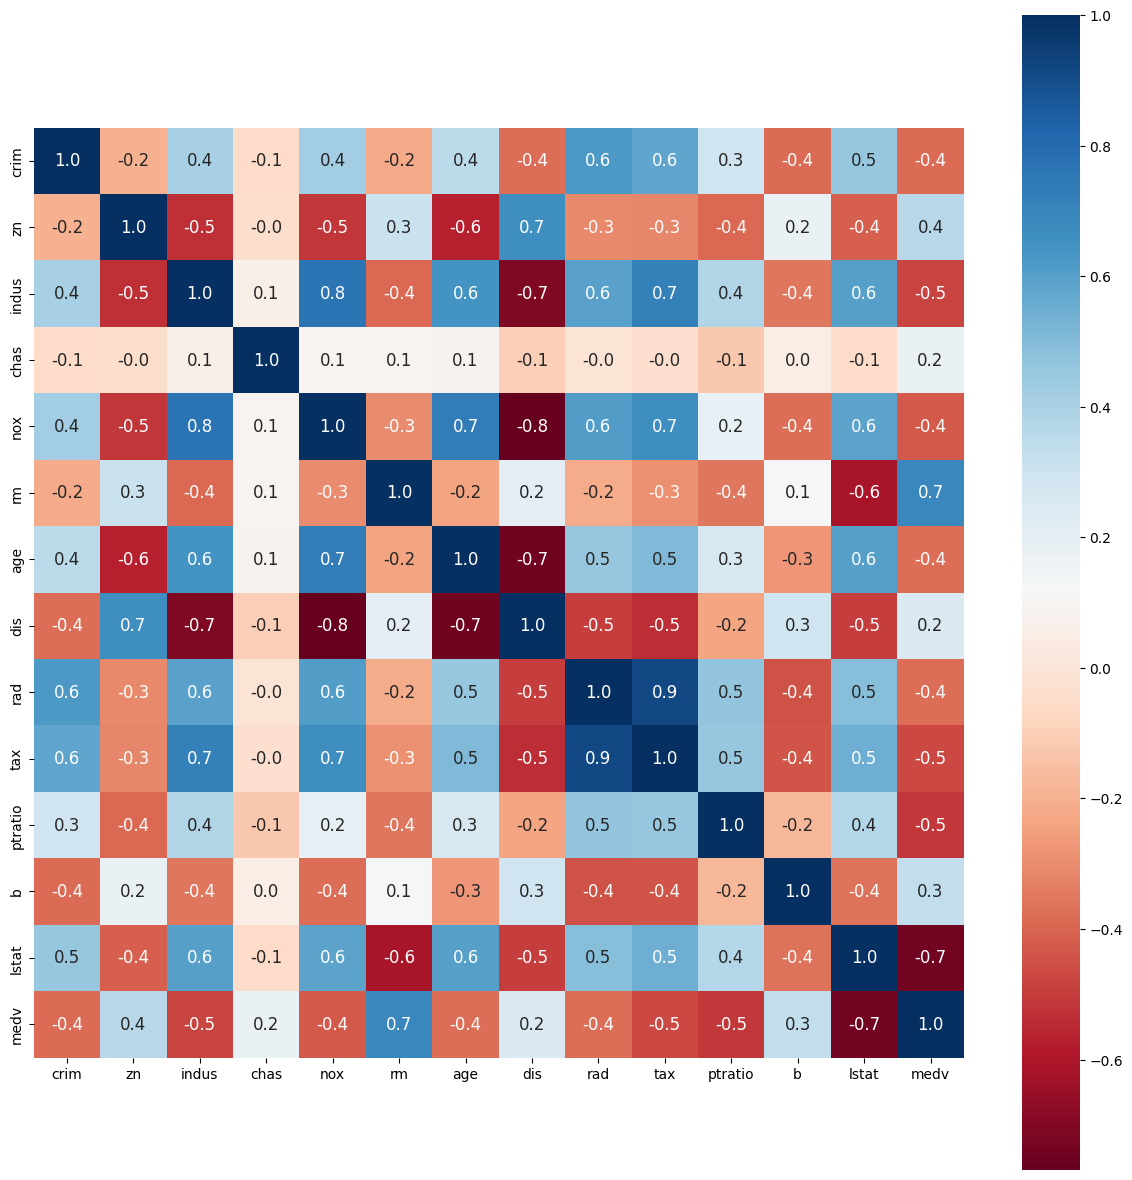

In [70]:
plt.figure(figsize=(15,15))
sns.heatmap(crr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='RdBu')

In [71]:
X = np.array(data[['age', 'rm']]) 
Y = np.array(data['medv'])
X.shape

(506, 2)

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [73]:
class LLS:
    def __init__(self):
        self.w = None
    def fit(self, X_train, Y_train):
        self.w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)),X_train.T),Y_train)
    def predict(self, X_test):
        return np.matmul(X_test, self.w)


In [77]:
lss = LLS()
lss.fit( X_train, Y_train)
Y_pred = lss.predict(X_test)

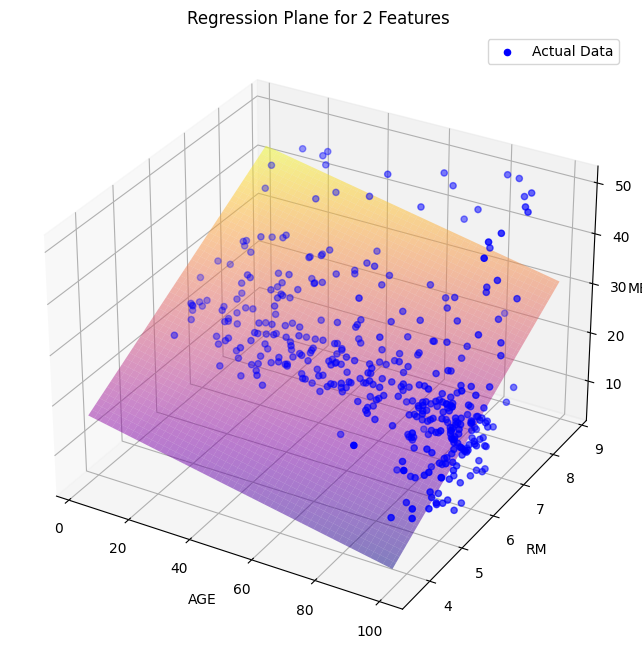

In [82]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], Y_train, c='b', marker='o', label='Actual Data')
age = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
rm = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
age_mesh, rm_mesh = np.meshgrid(age, rm)

X_pred = np.c_[age_mesh.ravel(), rm_mesh.ravel()]
Y_pred = lss.predict(X_pred)
Y_pred = Y_pred.reshape(age_mesh.shape)

# Plot the predicted plane
ax.plot_surface(age_mesh, rm_mesh, Y_pred, alpha=0.5, cmap='plasma')

# Set labels for the axes
ax.set_xlabel('AGE')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

# Set the title
plt.title('Regression Plane for 2 Features')

# Add a legend
ax.legend()

# Show the plot
plt.show()